## Analysis of access data

> **Developing some interactive visualisations that highlight key statistics from our access data.** This consists of a series of spreadsheets, providing details of applications to SYNTHESYS for researcher visits to participating Natural History Collections across Europe, and the research outputs (primarily publications) generated through these visits. Depending on the consistency of these datasets we will try to provide them through to the first iteration of SYSTHESYS so they will cover about 4k funded research projects. Various aspects of these data (including unsuccessful applications) might be explored and we will work with you to highlight these, alongside a handful of high profile projects which we may seek to promote.

## Table of contents
<div id="toc"></div>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [4]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## 1. Read and understand the access data

In [6]:
df = pd.read_csv("/Users/Ben/Work/Vizzuality/SYNTHESIS/FullExportAnon.csv", encoding="mac_cyrillic")  # this dataset is private!

In [7]:
# Column names in dataframe
df.keys()

Index(['User_Code', 'Call_Submitted', 'Applicant_Age_Visit_Start',
       'User_NHM.Gender', 'User_NHM.Researcher_status', 'HostInstName1',
       'User_NHM.Home_Institution_Name', 'User_NHM.Home_Institution_Type',
       'User_NHM.Home_Institution_Town',
       'User_NHM.Home_Institution_Country_code',
       'NHM_Disciplines.DisciplineName', 'ProjectsView.Project_Discipline_ID',
       'NHM_Specific_Disciplines.SpecificDisciplineName',
       'ProjectsView.Project_Specific_Discipline_ID', 'ProjectStart_Year',
       'ProjectStart_Quarter', 'ProjectStart_Month', 'ProjectStart_Day',
       'ProjectsView.length_of_visit', 'NHM_Installation_Use.Acceptance',
       'NHM_Installation_Use.Amount_of_Access_Delivered',
       'NHM_Installation_Use.Infrastructure_Short_Name',
       'NHM_Installation_Use.Installation_ID',
       'NHM_Installation_Use.Installation_Long_Name',
       'NHM_Installation_Use.Installation_Short_Name',
       'ProjectsView.Visit_Funded_Previously', 'SynthRound', 'TAF

In [8]:
df.head()

,User_Code,Call_Submitted,Applicant_Age_Visit_Start,User_NHM.Gender,User_NHM.Researcher_status,HostInstName1,User_NHM.Home_Institution_Name,User_NHM.Home_Institution_Type,User_NHM.Home_Institution_Town,User_NHM.Home_Institution_Country_code,...,NHM_Installation_Use.Acceptance,NHM_Installation_Use.Amount_of_Access_Delivered,NHM_Installation_Use.Infrastructure_Short_Name,NHM_Installation_Use.Installation_ID,NHM_Installation_Use.Installation_Long_Name,NHM_Installation_Use.Installation_Short_Name,ProjectsView.Visit_Funded_Previously,SynthRound,TAF_ID,TAF_Name
0,User0,1,32,M,PDOC,NRM,Natural History Museum,RES,London,GB,...,True,10,SE-TAF,1,NRM,NRM,False,R2,1,SE-TAF
1,User0,4,39,M,EXP,National Museum Prague,University of Cambridge,UNI,Cambridge,GB,...,True,5,CZ-TAF,1,NMP Collections and Facilities,NMP,False,R3,1,CZ-TAF
2,User0,4,39,M,EXP,NRM,University of Cambridge,UNI,Cambridge,GB,...,True,7,SE-TAF,1,NRM,NRM,False,R3,1,SE-TAF
3,User1,1,40,M,PGR,NHM,University of Basel,UNI,Basel,CH,...,True,15,GB-TAF,3,NHM Collections and Laboratories,NHM COL MOL,False,R2,1,GB-TAF
4,User10,2,56,M,EXP,RBINS,NATIONAL MUSEUM WALES,RES,CARDIFF,GB,...,True,5,BE-TAF,1,RBINS,RBINS,False,R2,1,BE-TAF


In [9]:
print(f'Access dataset has {len(df):,g} rows')

Access dataset has 5,862 rows


In [10]:
unique_users = len(df['User_Code'].unique())
print(f"User_Code, the Anonymised user id column has {unique_users:,g} unqique entries")

User_Code, the Anonymised user id column has 2,474 unqique entries


In [11]:
d_users = Counter(df['User_Code']).most_common() # count and order the users

In [12]:
d_users[0:10]  # The top 10 users by number of appearances in the dataset

[('User1124', 23),
 ('User2023', 23),
 ('User1742', 22),
 ('User714', 22),
 ('User1553', 18),
 ('User1669', 18),
 ('User1695', 18),
 ('User1563', 16),
 ('User338', 16),
 ('User476', 15)]

In [13]:
reccurence = [user_reccurence[1] for user_reccurence in d_users]

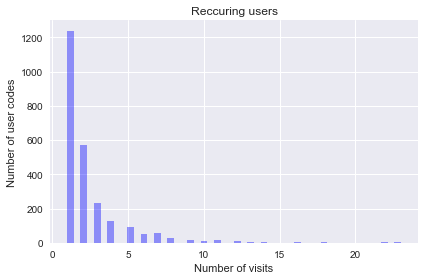

In [14]:
# Plot a simple histogram with binsize determined automatically
sns.distplot(reccurence, kde=False, color="b", axlabel='Number of visits')
plt.title("Reccuring users")
plt.ylabel("Number of user codes")
plt.tight_layout()

### What is actually diffrent when user_codes are the same?

In [15]:
mask = df['User_Code'] == 'User1124'
df[mask].head()

,User_Code,Call_Submitted,Applicant_Age_Visit_Start,User_NHM.Gender,User_NHM.Researcher_status,HostInstName1,User_NHM.Home_Institution_Name,User_NHM.Home_Institution_Type,User_NHM.Home_Institution_Town,User_NHM.Home_Institution_Country_code,...,NHM_Installation_Use.Acceptance,NHM_Installation_Use.Amount_of_Access_Delivered,NHM_Installation_Use.Infrastructure_Short_Name,NHM_Installation_Use.Installation_ID,NHM_Installation_Use.Installation_Long_Name,NHM_Installation_Use.Installation_Short_Name,ProjectsView.Visit_Funded_Previously,SynthRound,TAF_ID,TAF_Name
318,User1124,1,72,M,EXP,Museum National dТHistoire Naturelle,"in retirement, member of Czech Entomological S...",OTH,Adamov u Brna,CZ,...,True,5,FR-TAF,1,Collections,COLL,False,R3,1,FR-TAF
319,User1124,1,72,M,EXP,Museum National dТHistoire Naturelle,"in retirement, member of Czech Entomological S...",OTH,Adamov u Brna,CZ,...,True,0,FR-TAF,2,Facilities,INST,False,R3,1,FR-TAF
320,User1124,2,69,M,EXP,BGBM,"in retirement, member of Czech Entomological S...",OTH,Adamov u Brna,CZ,...,True,0,DE-TAF,1,BGBM Collections,BGBM COL,False,R2,1,DE-TAF
321,User1124,2,69,M,EXP,MfN,"in retirement, member of Czech Entomological S...",OTH,Adamov u Brna,CZ,...,True,5,DE-TAF,3,MfN Collections,MfN COL,False,R2,1,DE-TAF
322,User1124,2,73,M,EXP,MfN,"in retirement, member of Czech Entomological S...",OTH,Adamov u Brna,CZ,...,True,5,DE-TAF,3,MfN Collections,MfN COL,True,R3,1,DE-TAF


In [16]:
# Example of the most frequently appearing users data:

def give_date(year, month, day):
    months = {'January': 1, 'Feburary': 2, 'March':3, 'April':4, 'May':5,
              'June':6, "July":7, "August":8,"September":9, "October":10,
              "November":11, "December":12}
    return pd.datetime(int(year), months['November'], int(day))



for index, row in df[mask].iterrows():
    date = give_date(row['ProjectStart_Year'], row['ProjectStart_Month'], row['ProjectStart_Day'])
    age = row['Applicant_Age_Visit_Start']
    to_use = row['NHM_Installation_Use.Installation_Long_Name']
    calls = row['Call_Submitted']
    print('Start:',date.date(), "age:",age, calls, to_use)

Start: 2014-11-16 age: 72 1 Collections
Start: 2014-11-16 age: 72 1 Facilities
Start: 2011-11-09 age: 69 2 BGBM Collections
Start: 2011-11-09 age: 69 2 MfN Collections
Start: 2015-11-01 age: 73 2 MfN Collections
Start: 2011-11-10 age: 69 2 Collections
Start: 2015-11-22 age: 73 2 Collections
Start: 2015-11-01 age: 73 2 SGN Collections
Start: 2012-11-14 age: 70 3 NHM Analytical Facilities
Start: 2012-11-14 age: 70 3 NHM Collections and Laboratories
Start: 2013-11-15 age: 71 4 RBINS
Start: 2013-11-15 age: 71 4 RMCA
Start: 2017-11-20 age: 75 4 SGN Collections
Start: 2007-11-05 age: 65 6 NHM Collections
Start: 2007-11-05 age: 65 6 NHM Analytical Facilities
Start: 2008-11-15 age: 66 8 Collections
Start: 2008-11-15 age: 66 8 SEM
Start: 2008-11-15 age: 66 8 Molecular Laboratory
Start: 2008-11-15 age: 66 8 Analytical Facilities
Start: 2008-11-15 age: 66 8 Mass Spectrometry
Start: 2009-11-15 age: 67 9 NGB
Start: 2009-11-15 age: 67 9 RBINS
Start: 2009-11-15 age: 67 9 RMCA


### What are the unique codes in the data and their meaning?

In many places the data have shorthand codes, we will need to relate this shorthand to their actual meaning.

I can also use the Counter object here to get a first-pass idea of the frequency of each item.

In [17]:
Counter(df['Call_Submitted']).most_common() # Not sure what this is exactly.

[(4, 1183),
 (2, 1033),
 (3, 1029),
 (1, 990),
 (8, 542),
 (7, 322),
 (6, 301),
 (5, 274),
 (9, 188)]

In [18]:
Counter(df['User_NHM.Home_Institution_Type']).most_common()

[('UNI', 3588), ('RES', 1817), ('OTH', 409), ('SME', 45), ('PRV', 3)]

Different classifications of institute types. Will need to ask for specific definitions.

In [19]:
Counter(df['User_NHM.Researcher_status']).most_common()

[('EXP', 2000), ('PDOC', 1944), ('PGR', 1738), ('UND', 125), ('TEC', 55)]

Different researcher carrear levels (e.g. PDOC = postdoctorate investigator), will need to ask them for specific definitions.

In [20]:
Counter(df['Call_Submitted']).most_common()

[(4, 1183),
 (2, 1033),
 (3, 1029),
 (1, 990),
 (8, 542),
 (7, 322),
 (6, 301),
 (5, 274),
 (9, 188)]

In [21]:
Counter(df['NHM_Installation_Use.Amount_of_Access_Delivered']).most_common()[0:5] # must be an internal code indicating access level?

[(10, 1316), (0, 1063), (5, 881), (15, 583), (20, 318)]

In [22]:
Counter(df['NHM_Disciplines.DisciplineName']).most_common()  

[('Earth Sciences & Environment', 3323),
 ('Life Sciences & Biotech', 2465),
 ('Humanities', 38),
 ('Social Sciences', 15),
 ('Information & Communication Technologies', 8),
 ('Engineering & Technology', 5),
 (nan, 4),
 ('Material Sciences', 3),
 ('Physics', 1)]

If we look at disciplines via the `NHM_Disciplines.DisciplineName` variable, we have 2 catagories dominating

In [23]:
Counter(df['NHM_Specific_Disciplines.SpecificDisciplineName']).most_common()[0:10]

[('Other - Life Sciences & Biotech', 2001),
 ('Ecosystems & Biodiversity', 1286),
 ('FP6 - Ecosystems & Biodiversity', 1122),
 ('Other - Earth Sciences', 803),
 ('Molecular and cellular biology', 218),
 ('Ecology', 85),
 ('Other - Environment', 72),
 ('Marine science/Oceanography', 50),
 ('Global change & Climate observation', 46),
 ('FP6 - Global change & Climate observation', 36)]

If instead we look at disciplines via `NHM_Specific_Disciplines.SpecificDisciplineName` we get 5 substantial (>200 row) categories. This is a good number for displaying a break-down. We can aggregate those with < 200 rows int an other category.

Below we can examine the installations people are using. I have looked at these broken down by category, and it seems not to bear a strong correlation to discipline. 

In [24]:
Counter(df['NHM_Installation_Use.Installation_Long_Name']).most_common()

[('Collections', 716),
 ('NHM Collections and Laboratories', 421),
 ('NHM Collections', 418),
 ('NHMW', 397),
 ('NRM', 348),
 ('CSIC', 317),
 ('NHM Analytical Facilities', 305),
 ('RBINS', 237),
 ('ZBGM', 202),
 ('Kew', 166),
 ('RMCA', 161),
 ('UCPH', 160),
 ('Edinburgh', 151),
 ('Facilities', 132),
 ('MfN Collections', 122),
 ('NCB Naturalis', 116),
 ('MfN Zoology', 95),
 ('NHM Laboratories', 82),
 ('SEM', 81),
 ('Molecular Laboratory', 77),
 ('NNM', 73),
 ('MfN Laboratories', 73),
 ('NMP Collections and Facilities', 72),
 ('BGBM Collections', 70),
 ('MfN Palaeontology', 67),
 ('Analytical Facilities', 65),
 ('UVA', 63),
 ('Mass Spectrometry', 61),
 ('Molecular Analysis and Microscopy', 57),
 ('NHN', 56),
 ('BGBM Herbarium', 52),
 ('BGBM Laboratories', 45),
 ('SGN Collections', 42),
 ('Microscopy', 41),
 ('MIZPAN', 39),
 ('CBS', 35),
 ('BGBM SEM', 32),
 ('NGB', 32),
 ('SGN Laboratories', 30),
 ('Computing', 29),
 ('BGBM Living Collections', 29),
 ('SMNS', 28),
 ('MfN Mineralogy', 27),

I guess this means the number of times a unique researcher has applied for funding with the same combination of variables (will need to confirm this). If true, this might mean that if their researcher status changes, or affiliation, they would be given a different ID?


'Applicant_Age_Visit_Start'

'User_NHM.Gender'
      
'User_NHM.Researcher_status'
      
'HostInstName1',
     
'User_NHM.Home_Institution_Name'

'User_NHM.Home_Institution_Type'
     
'User_NHM.Home_Institution_Town'
     
'User_NHM.Home_Institution_Country_code'

### Simple stats to understand the data

#### Age of the users

In [25]:
def distribution(df, key, xlabel=None, ylabel=None, title=None):
    # Return a distribution plot e.g. to show the Age of users in a df object
    sns.distplot(df[key].values, kde=True, color="b", axlabel=xlabel)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

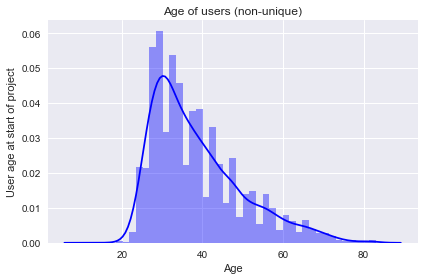

In [26]:
# age of users for all collection
distribution(df, key='Applicant_Age_Visit_Start', ylabel="User age at start of project", xlabel='Age',
             title="Age of users (non-unique)")

#### Gender of the users

In [39]:
def donut_plot(df, column_key, fix_keys=None, colors=None, json=False):
    """Pass an arbritrary dataframe with a key, and optional color scheme.
    Return a donut plot.
    """
    gender_counts = Counter(df[column_key])
    labels = []
    values = []
    if not fix_keys:
        for key in gender_counts:
            labels.append(key)
            values.append(gender_counts[key])
    else:
        for key in fix_keys:
            labels.append(key)
            values.append(gender_counts[key])        
    if json:
        return dict(gender_counts)
    else:
        explode = 0
        explode = (explode,) * len(labels)
        plt.pie(values, explode=explode, labels=labels,colors=colors,
                autopct='%1.1f%%', shadow=False)
        centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.75)
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal')
        plt.title("Gender balance")
        plt.show() 

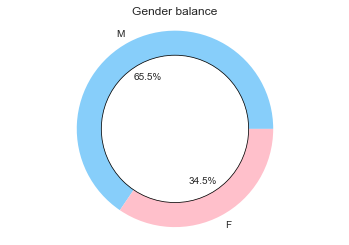

In [42]:
# Gender balance of all users
donut_plot(df, column_key='User_NHM.Gender', fix_keys=["M","F"], colors=['lightskyblue', 'pink'])

In [44]:
# Can directly get the json instead like this 
donut_plot(df, column_key='User_NHM.Gender', json=True)

{'F': 2021, 'M': 3841}

#### NHM Institution Destination of the users

In [50]:
def visits_destination(df, otherize_threshold=None, json=False):
    """Pass in a dataframe and return a plot of visitors Installation destination"""
    place_list = Counter(df['NHM_Installation_Use.Installation_Long_Name']).most_common()
    if otherize_threshold:
        top_list_with_other=[]
        other_sum = 0
        percent_limit = int(len(df)*otherize_threshold)
        cumulative = 0
        for k,v in place_list:
            cumulative += v
            if cumulative < percent_limit:
                top_list_with_other.append([k,v])
            else:
                other_sum += v
        top_list_with_other.append(['other', other_sum])
        place_list = top_list_with_other
    if json:
        return dict(place_list)
    else:
        places = []
        visits = []
        for c, num in place_list:
            places.append(c)
            visits.append(num)
        place_visists = pd.DataFrame(place_list, columns=['Installation','visits'])
        f, ax = plt.subplots(figsize=(6, 10))
        # Plot the total crashes
        sns.set_color_codes("pastel")
        sns.barplot(x="visits", y="Installation", data=place_visists,
                    label="Total", color="r")
        ax.set(ylabel='Installation', xlabel="number of visits", title="Visits by Installation")
        sns.despine(left=True, bottom=True)
        plt.show()


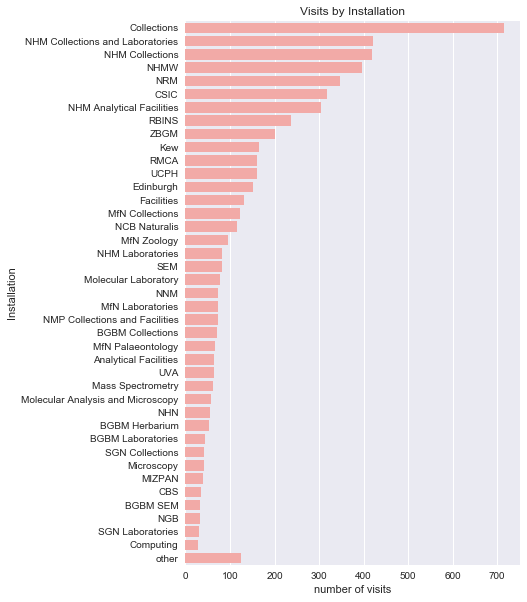

In [54]:
visits_destination(df, otherize_threshold=0.98)

#### Simple reporting of Counts and mean age

In [27]:
def group_stats(df):
    """For a dataframe print some stats we care about"""
    count = df['Applicant_Age_Visit_Start'].describe()['count']
    mean_age = df['Applicant_Age_Visit_Start'].describe()['mean']
    stdev_age = df['Applicant_Age_Visit_Start'].describe()['std']
    print(f"{count:g} visits. Average age = {mean_age:3.1f}±{stdev_age:3.1f}")
    return

In [28]:
group_stats(df)

5862 visits. Average age = 38.7±11.2


#### Classification of users Specific Discipline

In [56]:
def visitor_discipline(df, otherize_threshold=None, json=False):
    """Pass in a dataframe and return a plot of visitors per country.
    If you want the cumulative 95% to apper, and the last 5% to be grouped into other,
    then for example, set otherize_threshol=0.95
    """
    # 'NHM_Specific_Disciplines.SpecificDisciplineName'
    # 'NHM_Disciplines.DisciplineName'
    tmp = Counter(df['NHM_Specific_Disciplines.SpecificDisciplineName']).most_common()
    
    if otherize_threshold:
        top_list_with_other=[]
        other_sum = 0
        percent_limit = int(len(df)*otherize_threshold)
        cumulative = 0
        for k,v in tmp:
            cumulative += v
            if cumulative < percent_limit:
                top_list_with_other.append([k,v])
            else:
                other_sum += v
        top_list_with_other.append(['other', other_sum])
        tmp = top_list_with_other
    if json:
        return dict(tmp)
    else:
        topics = []
        visits = []
        for c,num in tmp:
            topics.append(c)
            visits.append(num)
        discipline_visists = pd.DataFrame(tmp, columns=['disciplines','visits'])
        f, ax = plt.subplots(figsize=(6, 10))
        sns.set_color_codes("pastel")
        sns.barplot(x="visits", y="disciplines", data=discipline_visists,
                    label="Total", color="g")
        ax.set(ylabel='Country', xlabel="number of visits", title="Visits by discipline")
        sns.despine(left=True, bottom=True)
        plt.show()

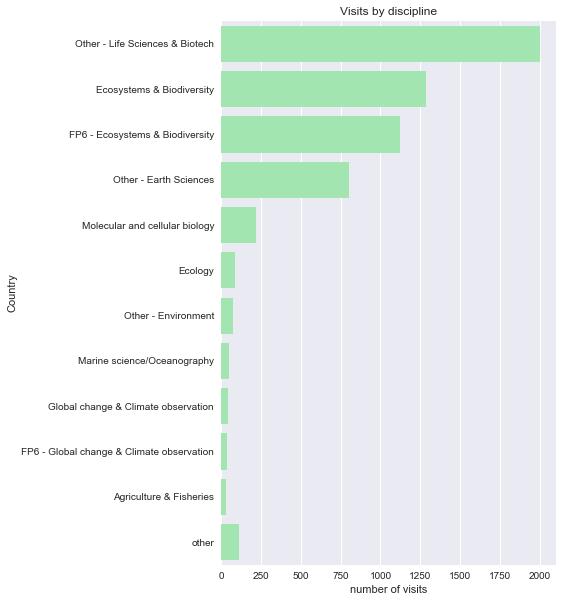

In [59]:
visitor_discipline(df, otherize_threshold=0.985, json=False)

#### Breakdown of users by country

In [38]:
def visits_per_country(df, otherize_threshold=None):
    """Pass in a dataframe and return a plot of visitors per country"""
    countries = Counter(df['User_NHM.Home_Institution_Country_code']).most_common()
    if otherize_threshold:
        top_list_with_other=[]
        other_sum = 0
        percent_limit = int(len(df)*otherize_threshold)
        cumulative = 0
        for k,v in countries:
            cumulative += v
            if cumulative < percent_limit:
                top_list_with_other.append([k,v])
            else:
                other_sum += v
        top_list_with_other.append(['other', other_sum])
        countries = top_list_with_other
    places = []
    visits = []
    for c,num in countries:
        places.append(c)
        visits.append(num)
    country_visists = pd.DataFrame(countries, columns=['country','visits'])
    f, ax = plt.subplots(figsize=(6, 10))
    sns.set_color_codes("pastel")
    sns.barplot(x="visits", y="country", data=country_visists,
                label="Total", color="b")
    ax.set(ylabel='Country', xlabel="number of visits", title="Visits by country")
    sns.despine(left=True, bottom=True)
    plt.show()


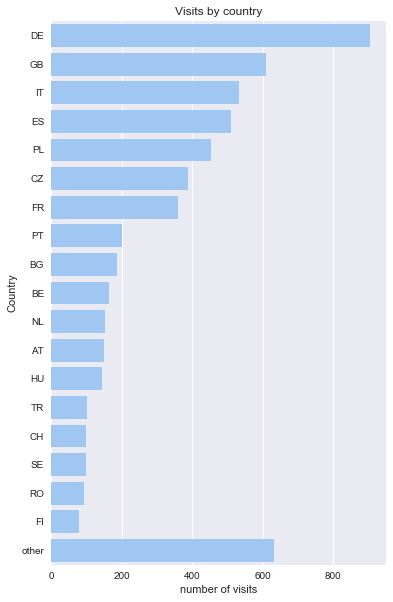

In [46]:
visits_per_country(df, otherize_threshold=0.90)

#### Analysis of Lenght of users visit 

In [35]:
# In this case I will need to order by the keys, not the values
# Also, I want a displot again here.
Counter(df['ProjectsView.length_of_visit'])

Counter({0: 1,
         2: 19,
         3: 65,
         4: 66,
         5: 1049,
         6: 43,
         7: 138,
         8: 185,
         9: 91,
         10: 1944,
         11: 16,
         12: 120,
         13: 65,
         14: 73,
         15: 980,
         16: 4,
         17: 20,
         18: 33,
         19: 32,
         20: 507,
         21: 8,
         22: 15,
         23: 9,
         24: 7,
         25: 137,
         26: 9,
         27: 3,
         28: 1,
         29: 4,
         30: 114,
         35: 31,
         36: 4,
         37: 1,
         40: 42,
         44: 4,
         45: 8,
         50: 10,
         60: 4})

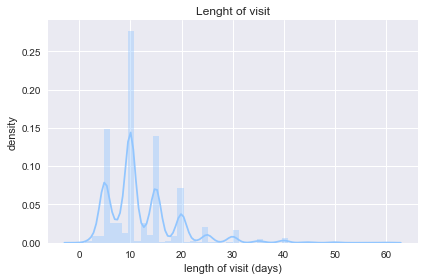

In [36]:
distribution(df, key='ProjectsView.length_of_visit',
             xlabel='length of visit (days)', ylabel='density',
             title="Lenght of visit")

## Filtering by discipline


DISCIPLINE: Other - life sciences & biotech
2001 visits. Average age = 40.1±12.4


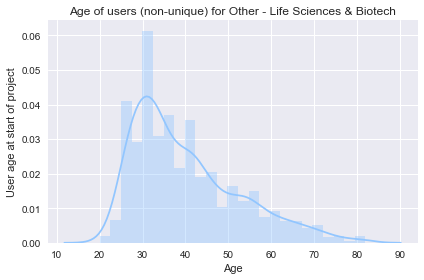

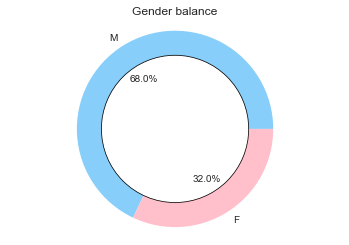

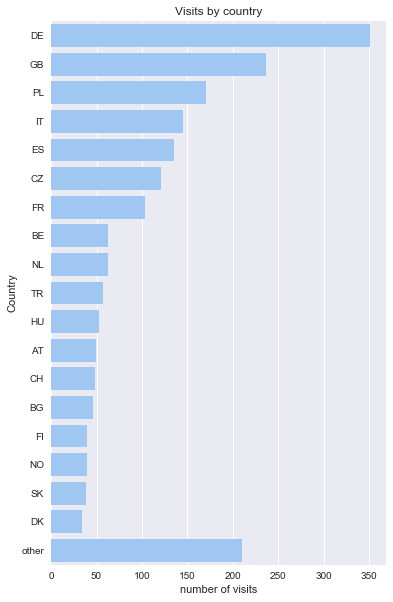

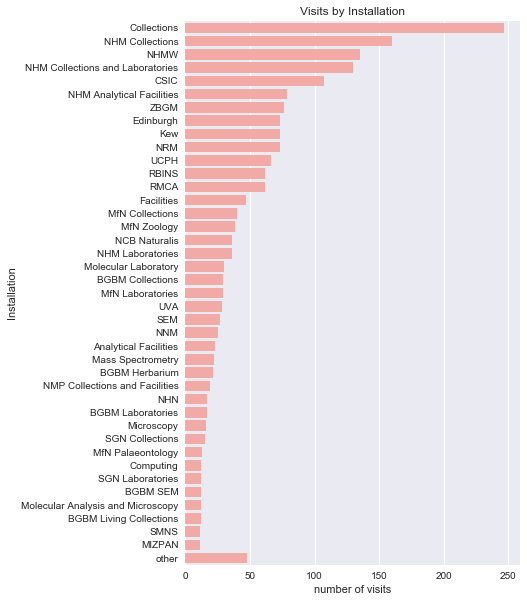

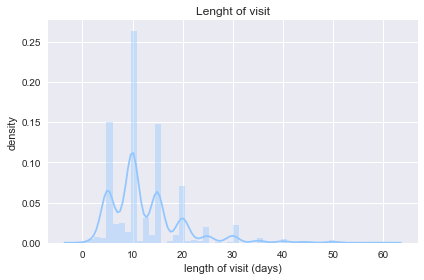


DISCIPLINE: Ecosystems & biodiversity
1286 visits. Average age = 38.4±10.3


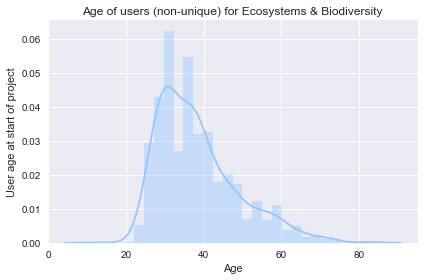

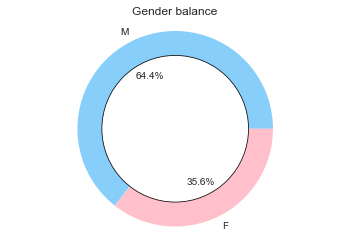

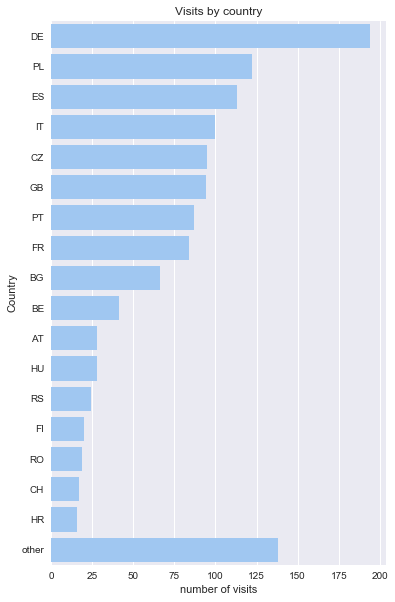

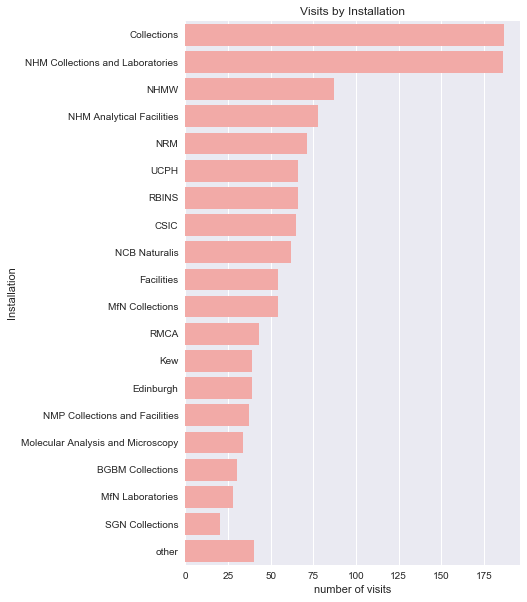

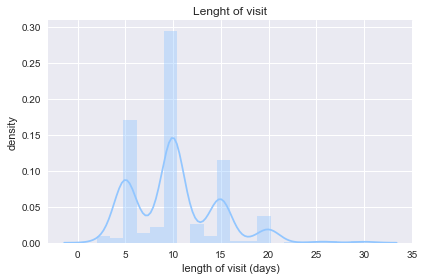


DISCIPLINE: Fp6 - ecosystems & biodiversity
1122 visits. Average age = 38.9±10.5


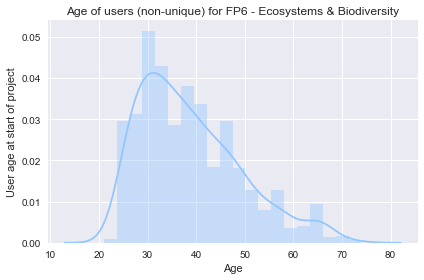

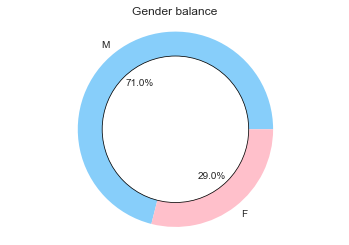

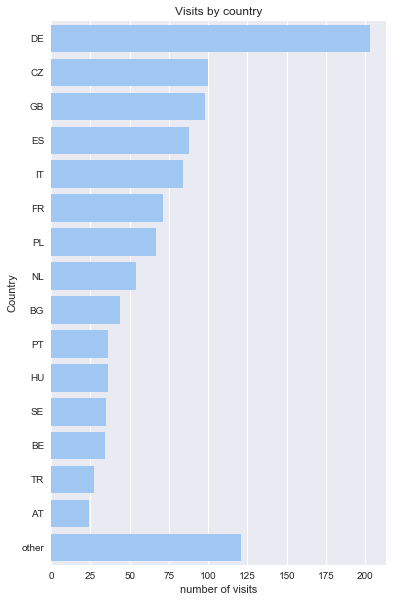

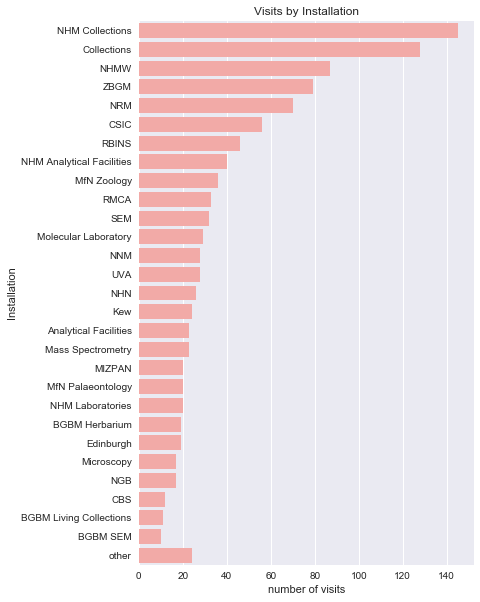

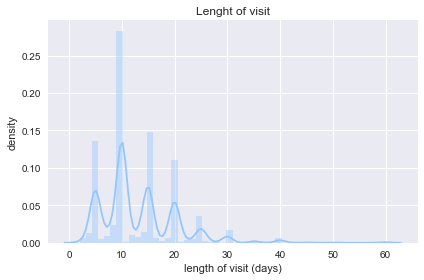


DISCIPLINE: Other - earth sciences
803 visits. Average age = 36.4±9.8


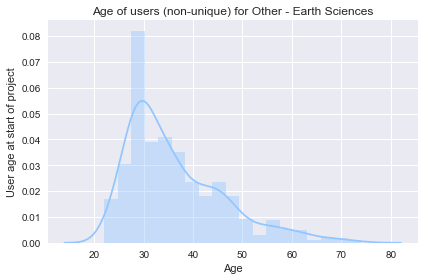

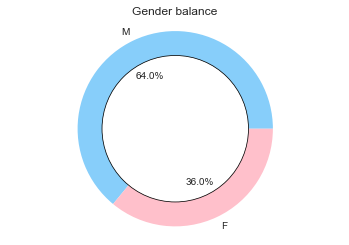

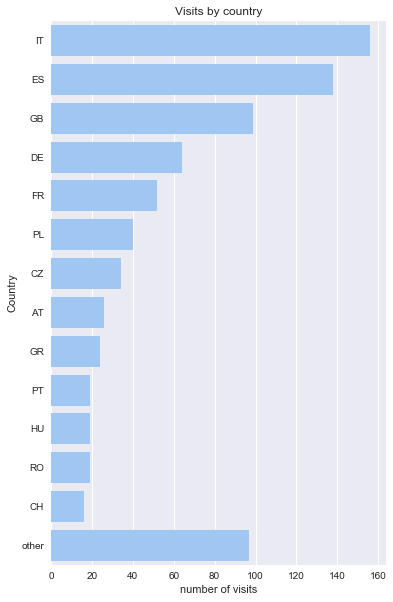

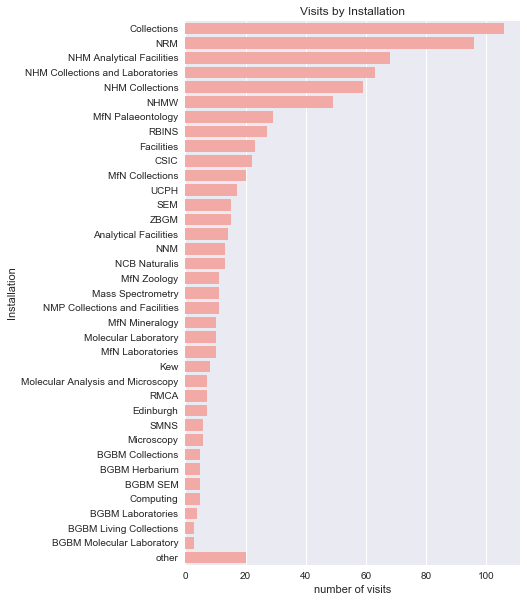

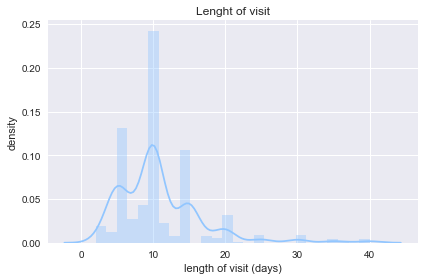


DISCIPLINE: Molecular and cellular biology
218 visits. Average age = 35.2±8.3


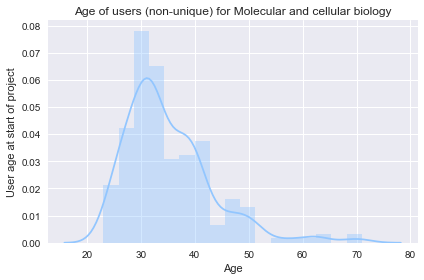

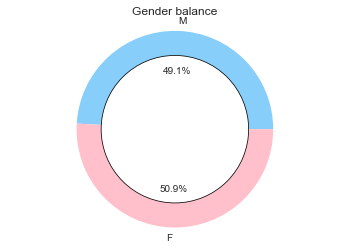

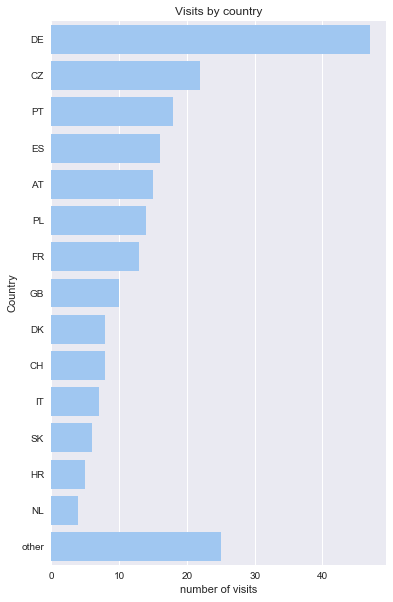

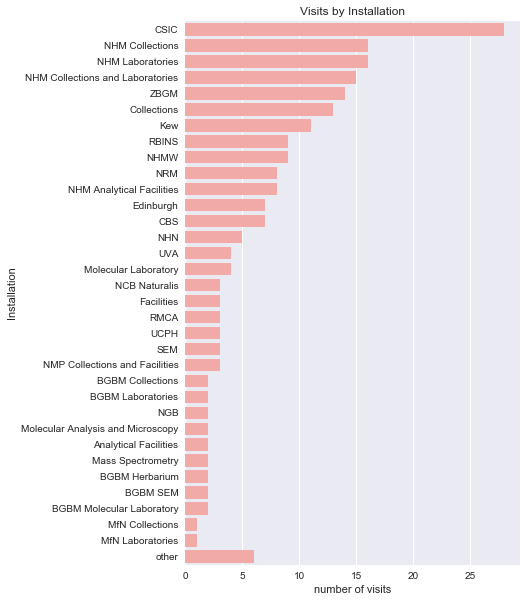

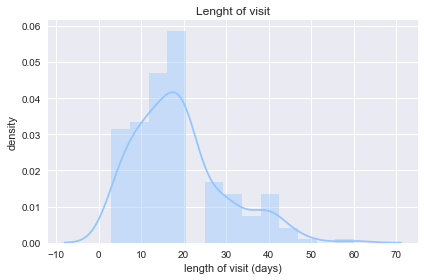


DISCIPLINE: Ecology
Only 85 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Other - environment
Only 72 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Marine science/oceanography
Only 50 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Global change & climate observation
Only 46 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Fp6 - global change & climate observation
Only 36 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Agriculture & fisheries
Only 33 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Other - humanities
Only 25 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Veterinary sciences
Only 18 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Other - social sciences
Only 16 entries for discipline. Not sufficent for analysis.

DISCIPLINE: History
Only 12 entries for discipline. Not sufficent for analysis.

DISCIPLINE: Medicine
Only 8 entries for 

In [60]:
# 'NHM_Specific_Disciplines.SpecificDisciplineName'
# 'NHM_Disciplines.DisciplineName'
filter_var = 'NHM_Specific_Disciplines.SpecificDisciplineName'
for discipline,_ in Counter(df[filter_var]).most_common():
    if isinstance(discipline, str):
        print(f"\nDISCIPLINE: {discipline.capitalize()}")
        mask = df[filter_var] == discipline
        if len(df[mask]) > 100:
            group_stats(df[mask])
            distribution(df[mask], key='Applicant_Age_Visit_Start',
                         ylabel="User age at start of project", xlabel='Age',
                         title=f"Age of users (non-unique) for {discipline}")
            donut_plot(df[mask], column_key='User_NHM.Gender', 
                       fix_keys=["M","F"], colors=['lightskyblue', 'pink'])
            visits_per_country(df[mask], otherize_threshold=0.90)
            visits_destination(df[mask], otherize_threshold=0.98)
            distribution(df[mask], key='ProjectsView.length_of_visit',
                         xlabel='length of visit (days)', ylabel='density',
                         title="Lenght of visit")   
        else:
            print(f"Only {len(df[mask])} entries for discipline. Not sufficent for analysis.")


## Filtering by Researcher Origin Country

Examples of what it looks like to do summary stats per country

Data grouped for DE:
904 visits. Average age = 37.1±8.9


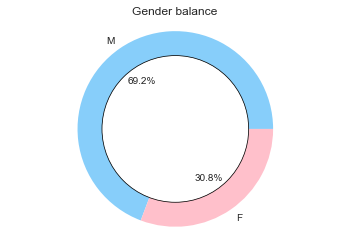

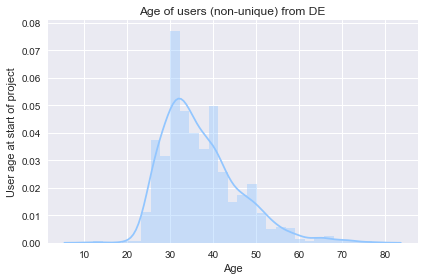

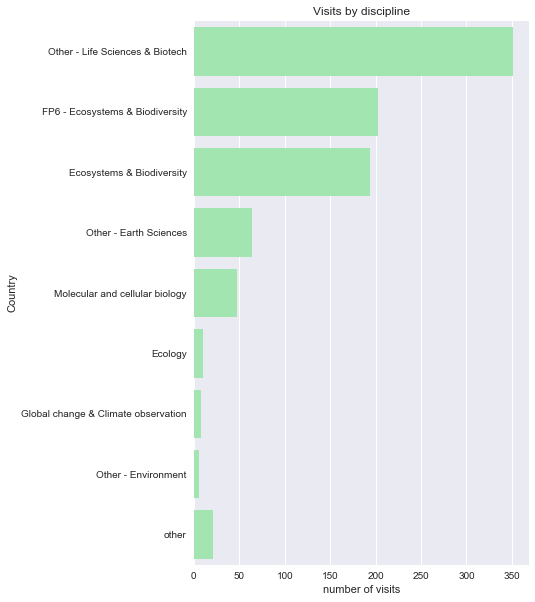

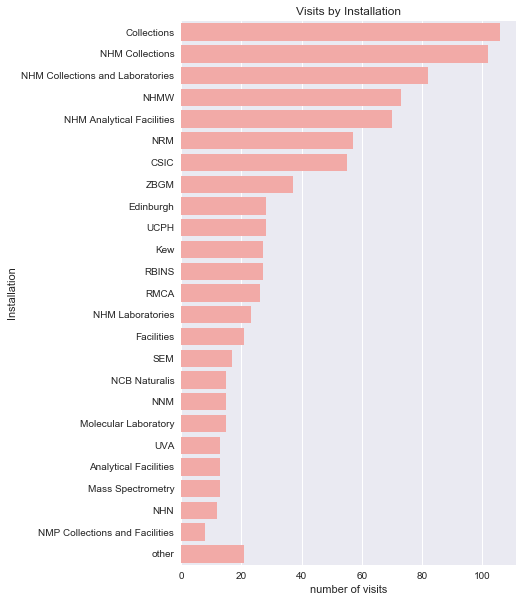

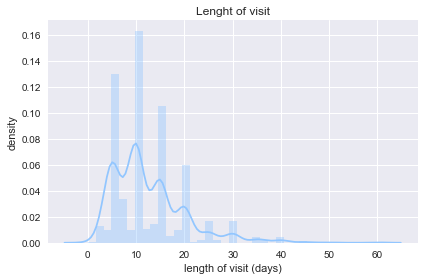

Data grouped for GB:
609 visits. Average age = 40.0±13.1


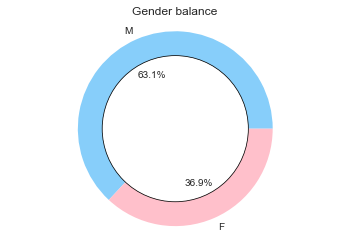

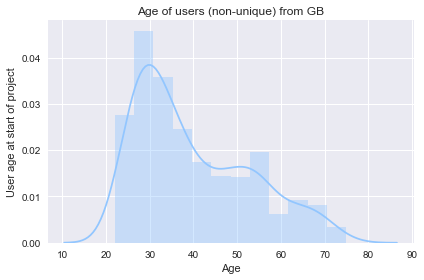

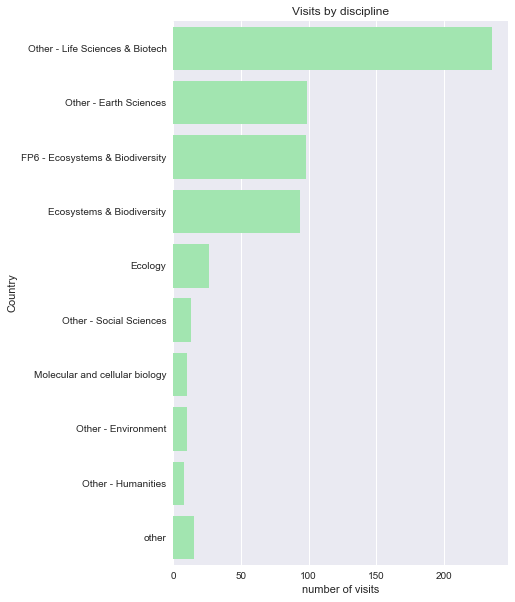

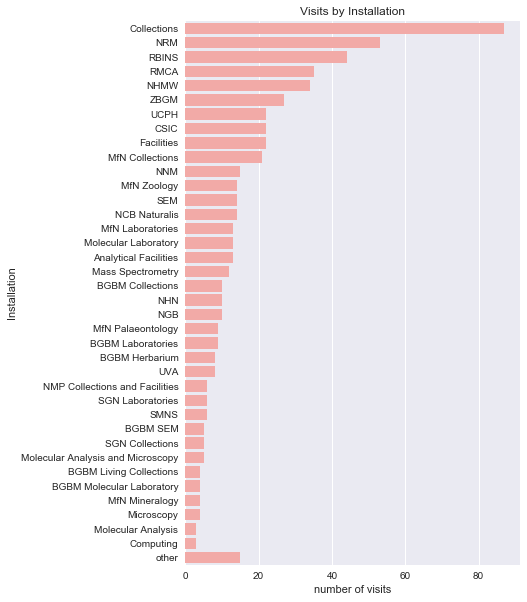

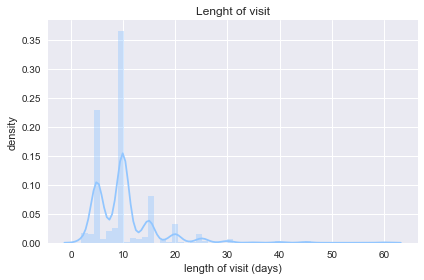

Data grouped for IT:
534 visits. Average age = 39.7±10.3


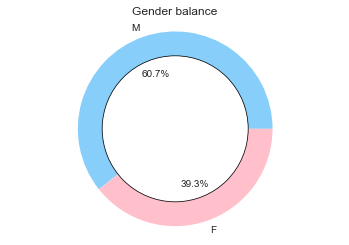

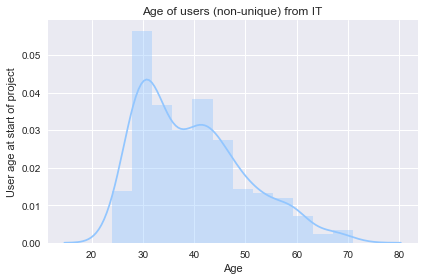

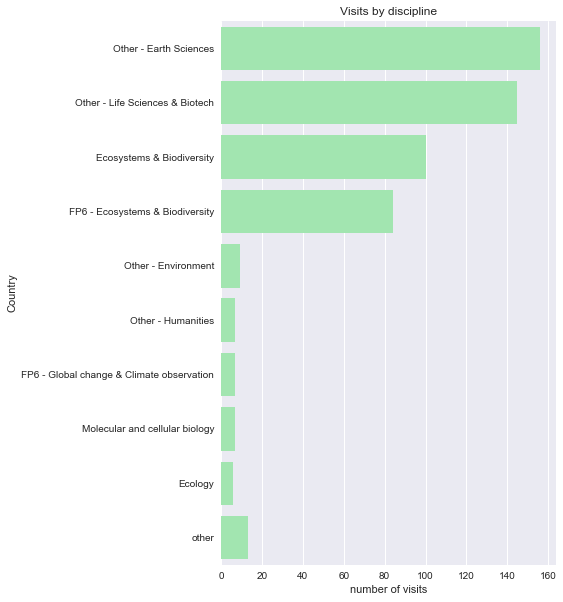

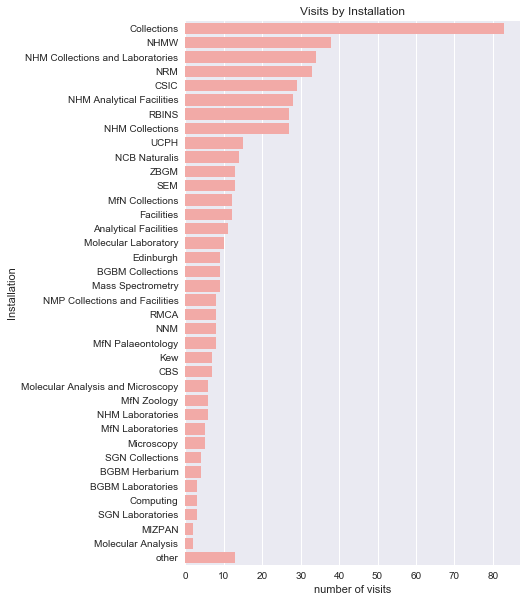

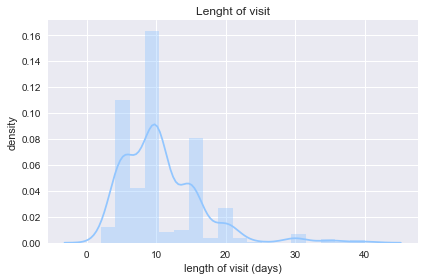

Data grouped for ES:
510 visits. Average age = 37.2±10.0


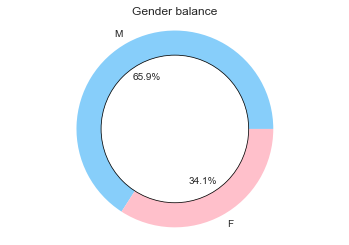

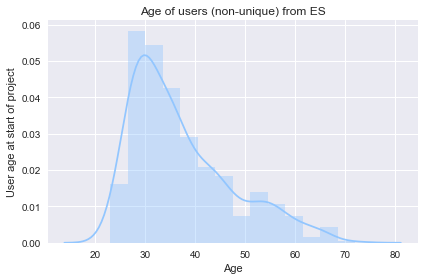

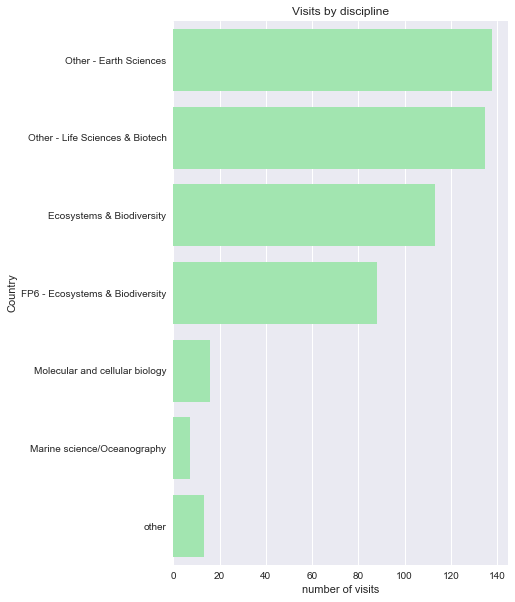

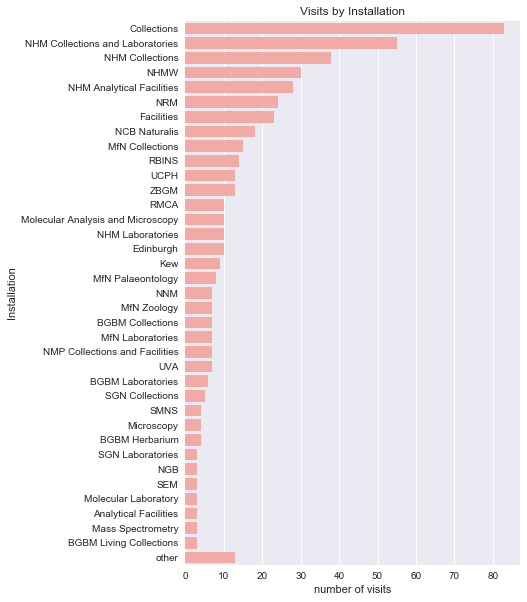

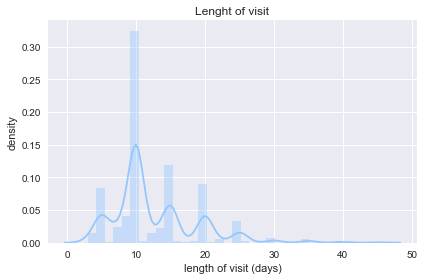

Data grouped for PL:
453 visits. Average age = 35.5±9.4


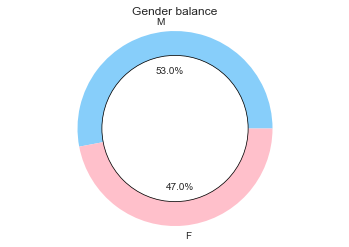

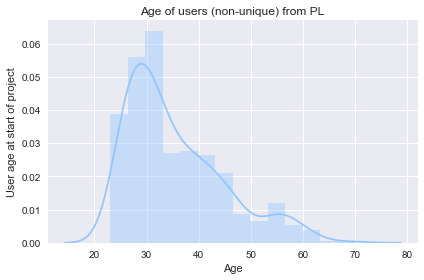

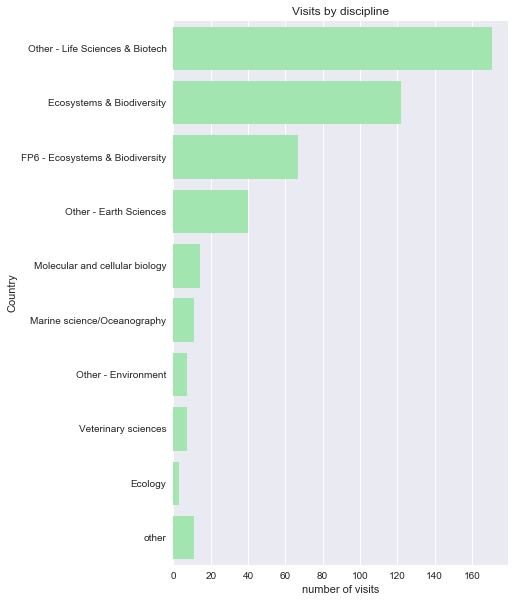

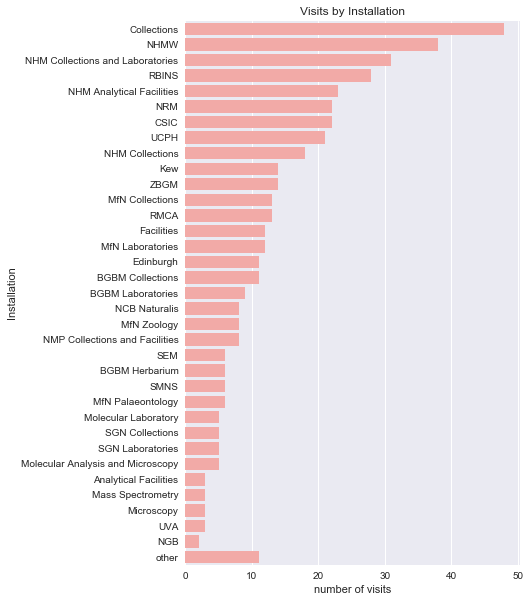

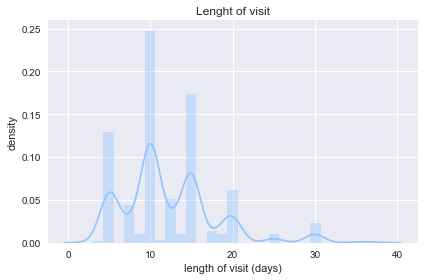

Data grouped for CZ:
389 visits. Average age = 40.1±13.9


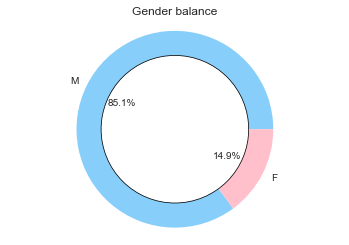

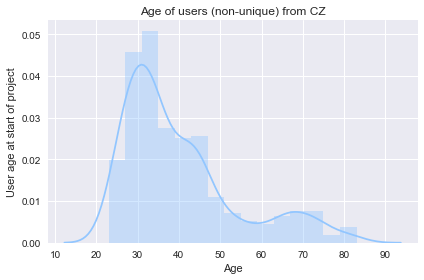

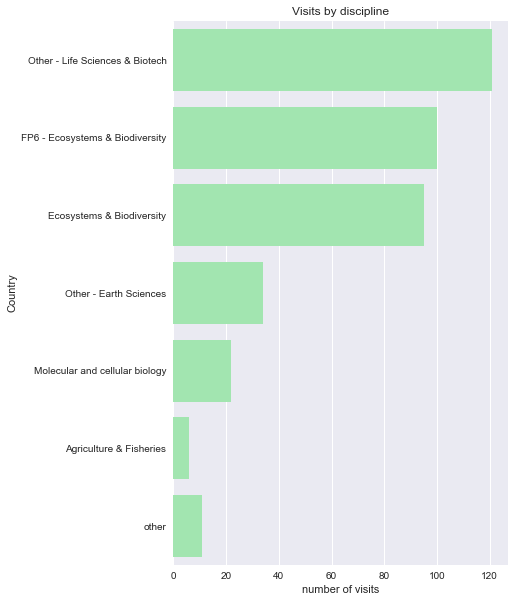

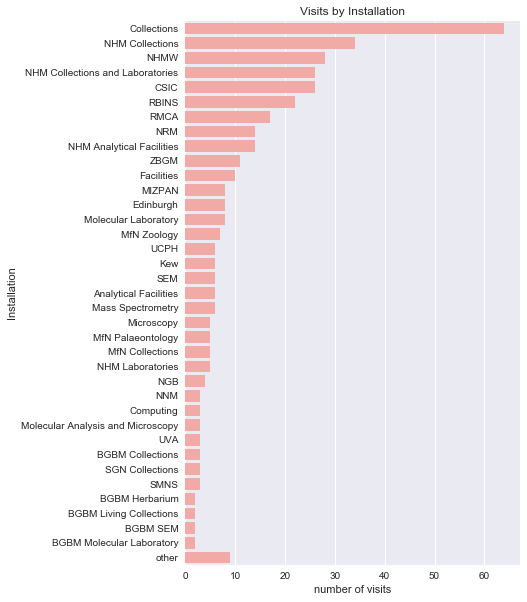

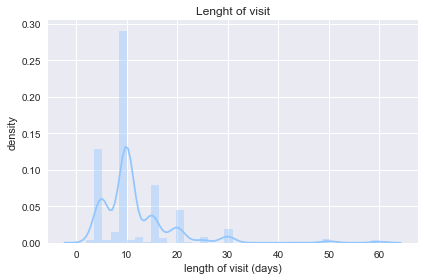

Data grouped for FR:
359 visits. Average age = 38.8±12.5


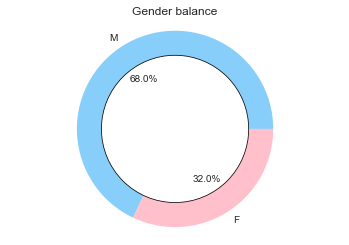

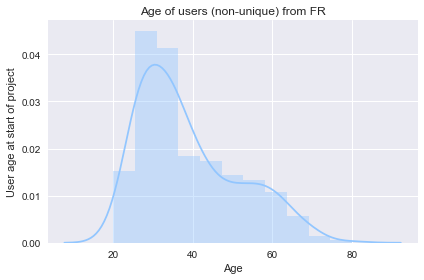

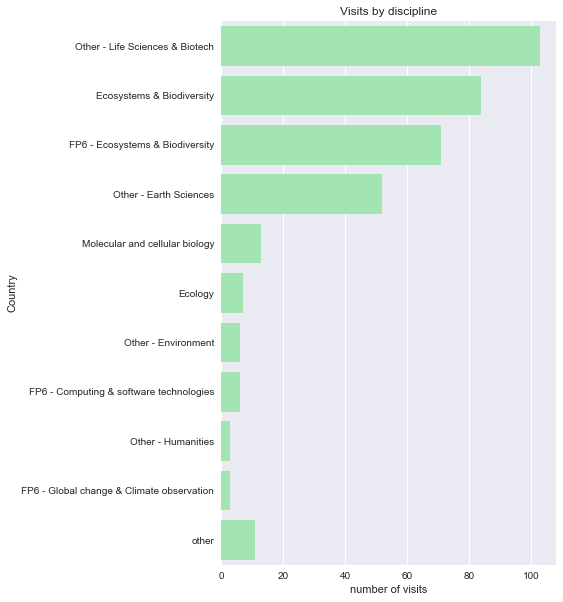

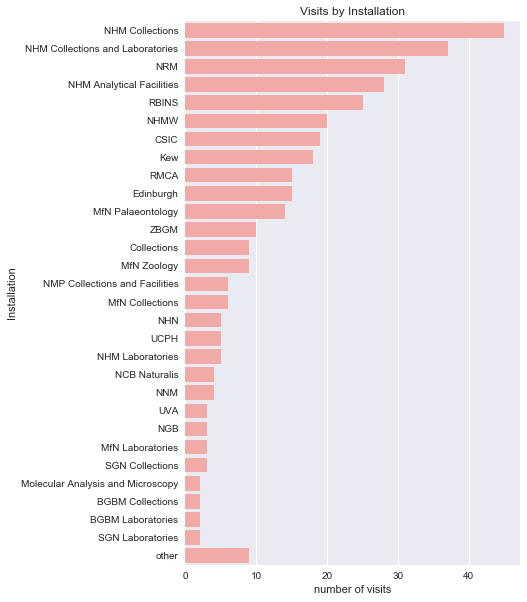

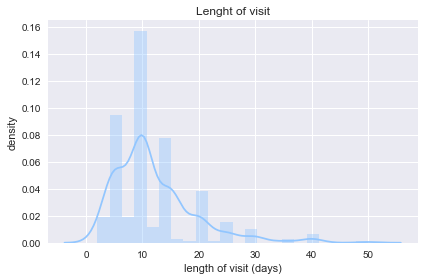

Data grouped for PT:
200 visits. Average age = 35.0±7.6


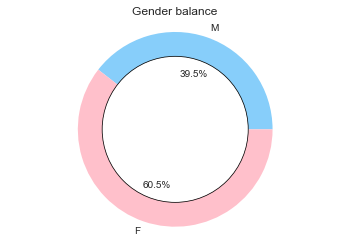

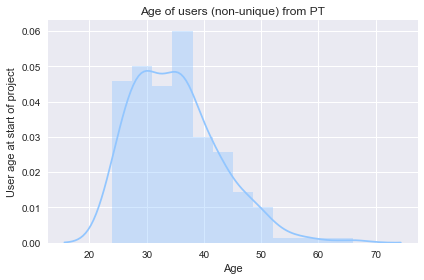

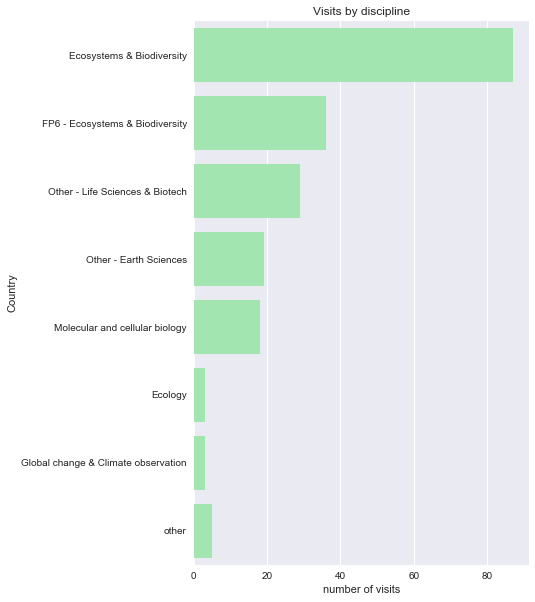

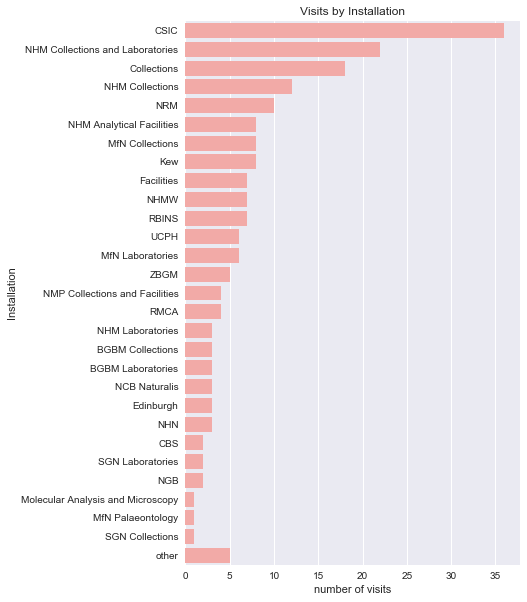

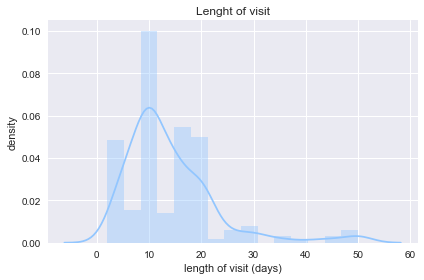

Data grouped for BG:
187 visits. Average age = 42.6±11.2


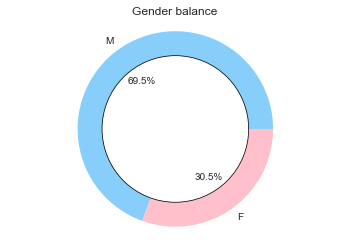

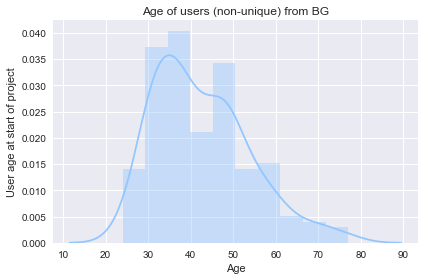

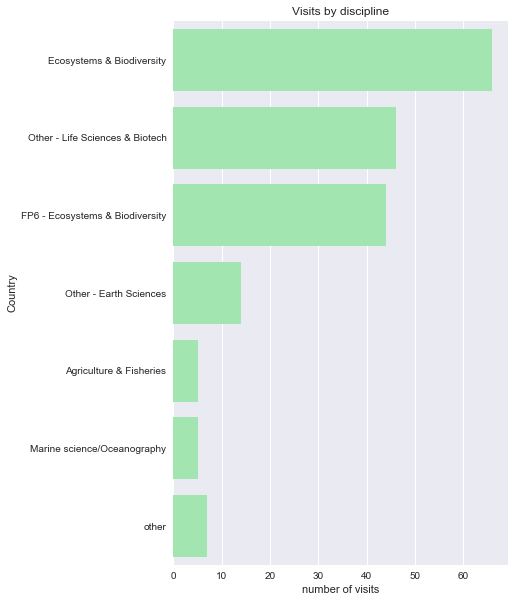

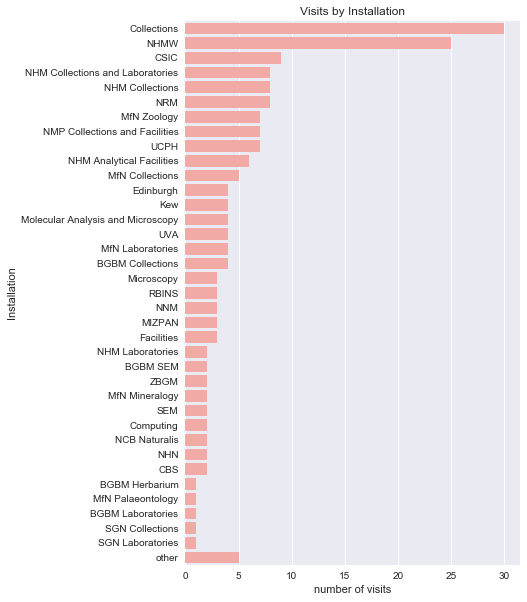

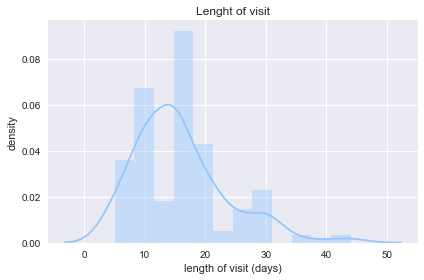

Data grouped for BE:
165 visits. Average age = 37.1±9.8


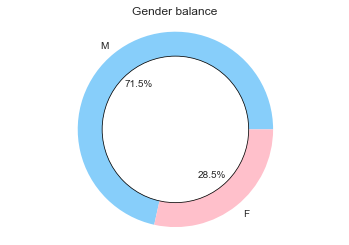

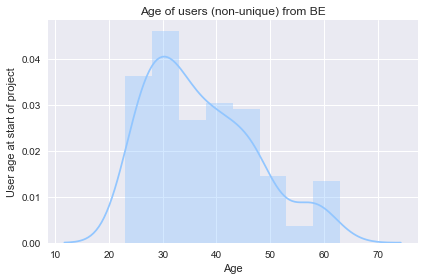

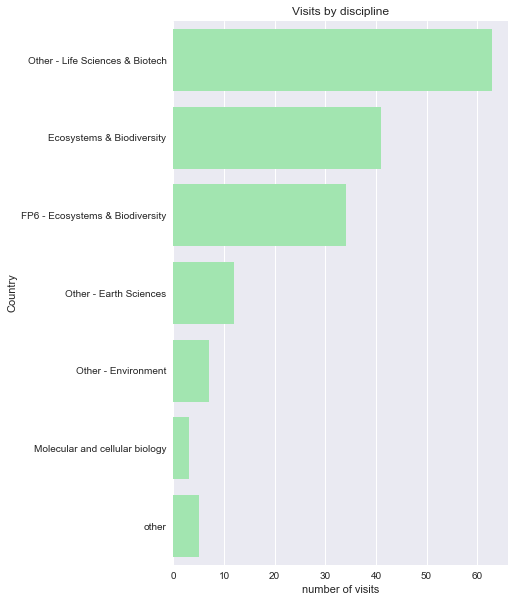

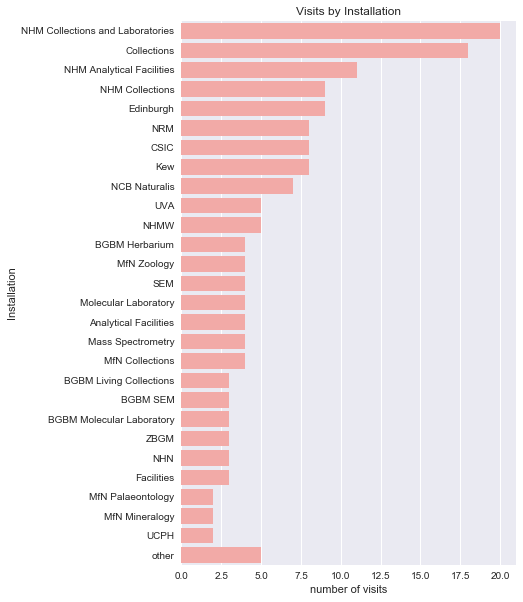

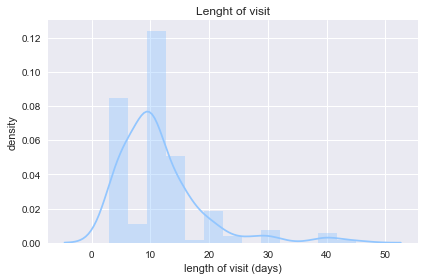

Data grouped for NL:
152 visits. Average age = 46.3±13.4


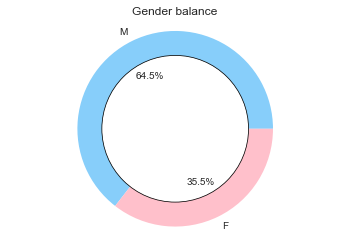

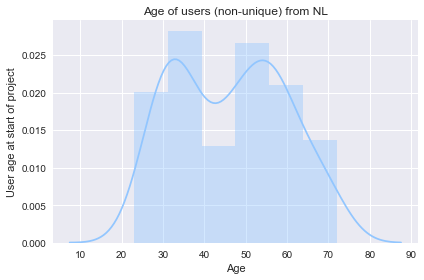

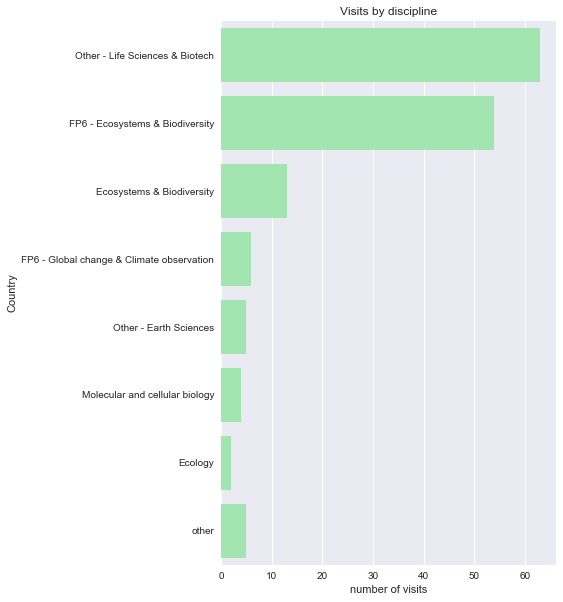

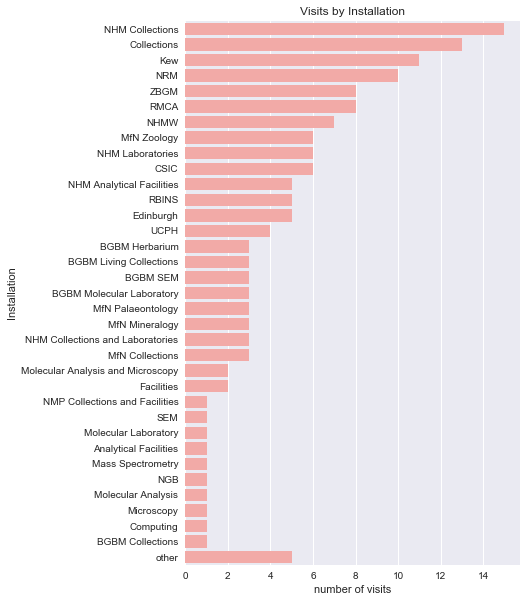

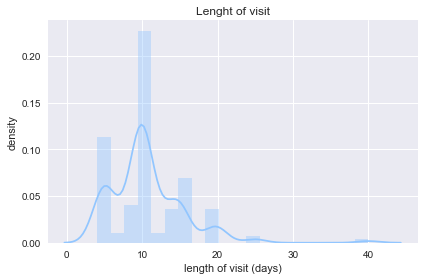

Data grouped for AT:
149 visits. Average age = 39.7±8.1


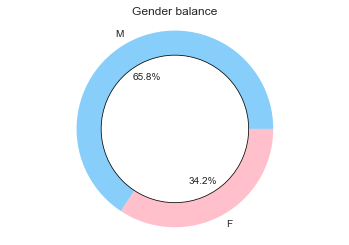

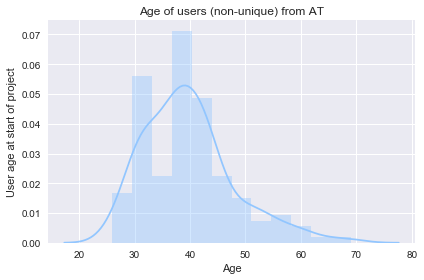

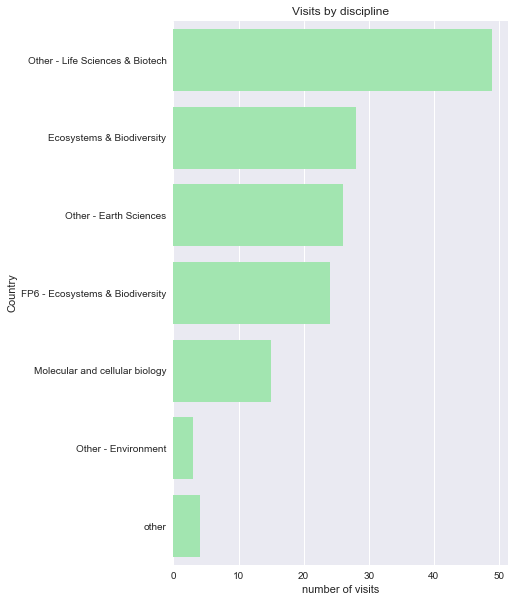

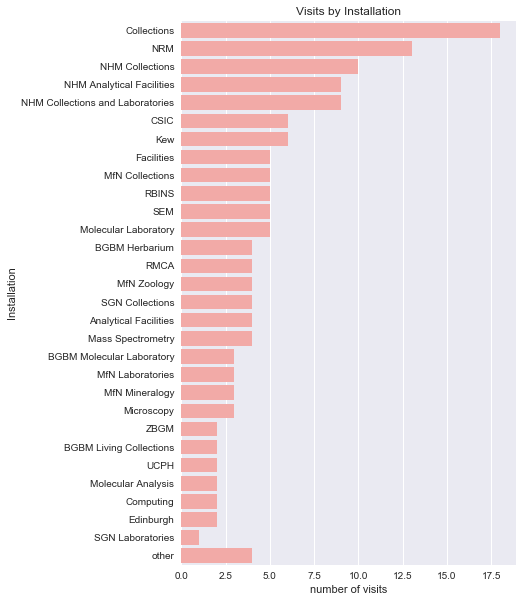

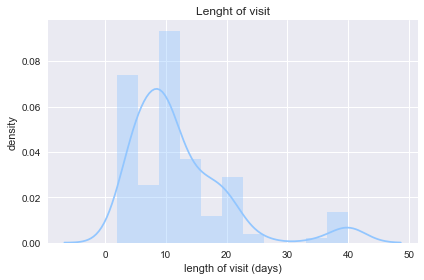

Data grouped for HU:
145 visits. Average age = 42.1±13.3


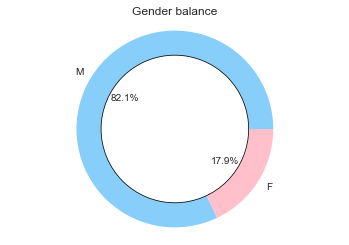

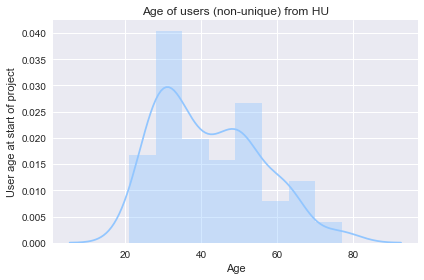

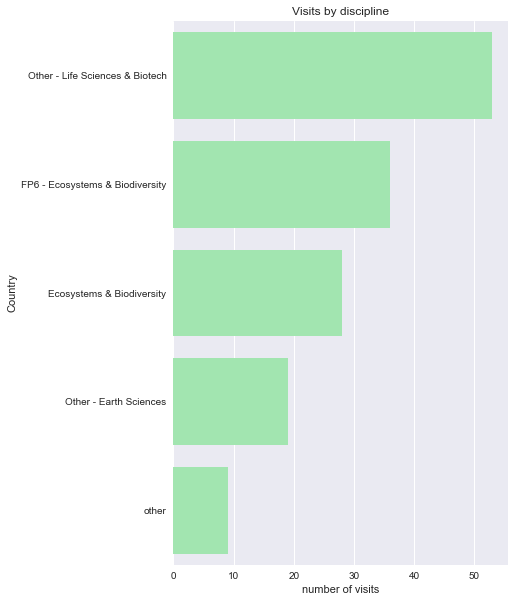

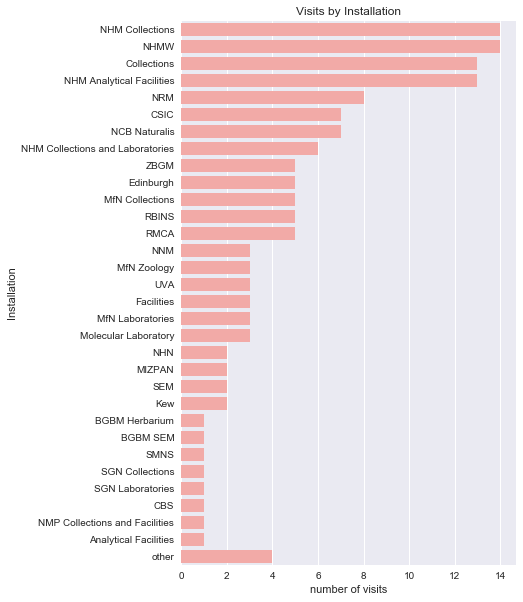

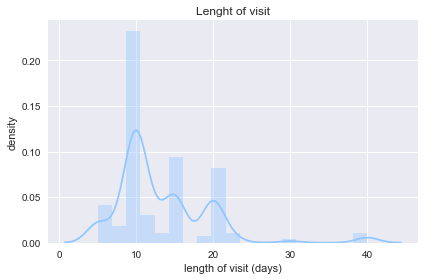

Data grouped for TR:
102 visits. Average age = 36.8±5.8


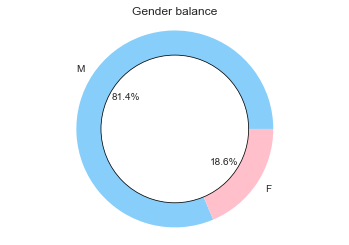

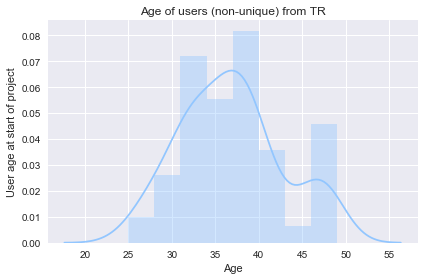

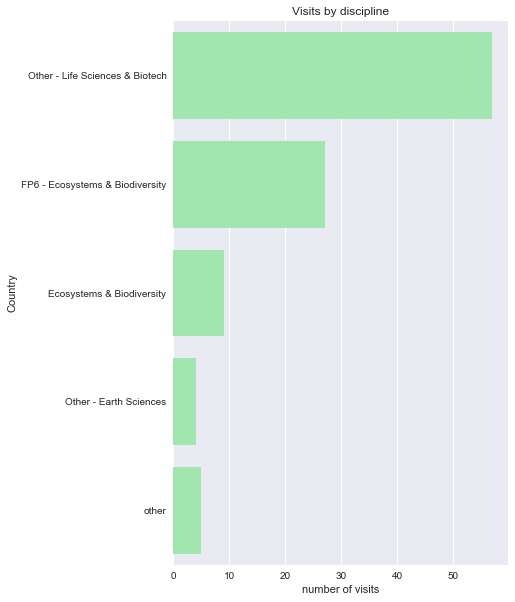

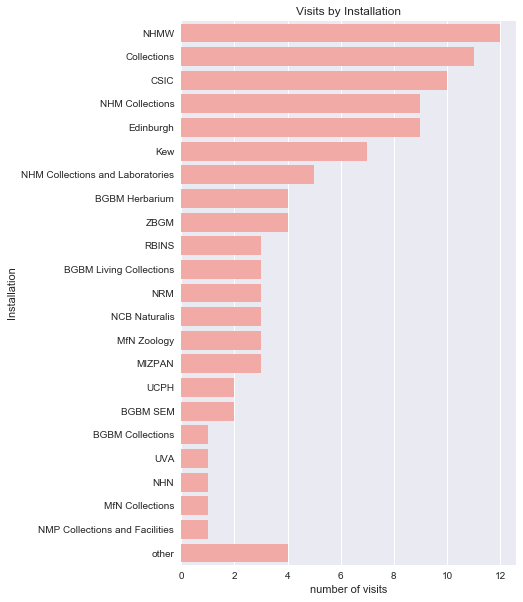

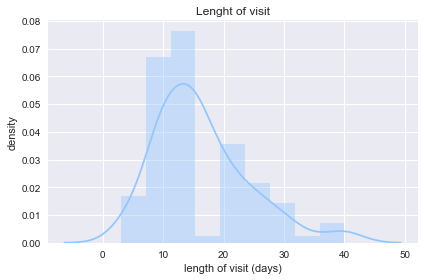

Data grouped for CH:
Only 99 entries for CH; Not sufficent for meaningful analysis.
Data grouped for SE:
Only 99 entries for SE; Not sufficent for meaningful analysis.
Data grouped for RO:
Only 93 entries for RO; Not sufficent for meaningful analysis.
Data grouped for FI:
Only 80 entries for FI; Not sufficent for meaningful analysis.
Data grouped for DK:
Only 77 entries for DK; Not sufficent for meaningful analysis.
Data grouped for IL:
Only 73 entries for IL; Not sufficent for meaningful analysis.
Data grouped for SK:
Only 68 entries for SK; Not sufficent for meaningful analysis.
Data grouped for IE:
Only 68 entries for IE; Not sufficent for meaningful analysis.
Data grouped for NO:
Only 67 entries for NO; Not sufficent for meaningful analysis.
Data grouped for GR:
Only 62 entries for GR; Not sufficent for meaningful analysis.
Data grouped for RS:
Only 57 entries for RS; Not sufficent for meaningful analysis.
Data grouped for EE:
Only 35 entries for EE; Not sufficent for meaningful an

In [63]:
for country, _ in Counter(df['User_NHM.Home_Institution_Country_code']).most_common():
    print(f"Data grouped for {country}:")
    mask = df['User_NHM.Home_Institution_Country_code'] == country
    if len(df[mask]) > 100:
        group_stats(df[mask])
        donut_plot(df[mask], column_key='User_NHM.Gender', 
                   fix_keys=["M","F"], colors=['lightskyblue', 'pink'])
        distribution(df[mask], key='Applicant_Age_Visit_Start',
                     ylabel="User age at start of project", xlabel='Age',
                     title=f"Age of users (non-unique) from {country}")
        visitor_discipline(df[mask], otherize_threshold=0.98)
        visits_destination(df[mask], otherize_threshold=0.98)
        distribution(df[mask], key='ProjectsView.length_of_visit',
                     xlabel='length of visit (days)', ylabel='density',
                     title="Lenght of visit")   
    else:
        print(f"Only {len(df[mask])} entries for {country}; Not sufficent for meaningful analysis.")
    
    

 Need to get the the country codes of NHM

### Design a table to hold these processed data and simplify the data request

I can put these statistical views into a country-wise and discipline-wise statistical summary view of the access data. Seems that filtering by country or by discipline will create small dictionaries that we can load directly into webpages to make things fast.

In [62]:
d={}
for country, _ in Counter(df['User_NHM.Home_Institution_Country_code']).most_common():
    country_d = {}
    if country == country:
        mask = df['User_NHM.Home_Institution_Country_code'] == country
        country_d['sex'] = donut_plot(df[mask], column_key='User_NHM.Gender', json=True)
        country_d['destination'] = visits_destination(df[mask], json=True)
        country_d['discipline']=visitor_discipline(df[mask], json=True)
        d[country] = country_d

#d

In [65]:
json = json.dumps(d)
with open("./test_per_country.json","w") as f:
    f.write(json)